## Assignment #7: Files & Exception Handling
Zachary Gmyr,
10/4/2024,
CS4200

#### 9.1 Writing Grades to a Plain Text File
Write code that enables you to store any number of grades into a grades.txt plain text file

In [132]:
# using a file 'grades.txt'

with open('grades.txt', mode='w') as grades_file:
    while True:
        name = input("Enter student name (or 'exit'): ")

        # end with 'exit'
        if (name == "exit"):
            break

        # ensure that grade is a numeric value (required for computing stats in next question)
        try:
            grade = float(input(f'Enter a course grade (%) for {name}: '))

            # ensure this is a valid grade
            while (grade < 0.0 or grade > 100.0):
                print(f'{grade} is NOT a valid grade, please try again...')
                grade = float(input(f'Enter a course grade (%) for {name}: '))

            # write the name & grade to file, round down to two decimals
            grades_file.write(' '.join([name,str(f'{grade:.2f}')]) + '\n')
        except (ValueError):
            print("Please enter the grade as numeric value (try again)...")

Enter student name (or 'exit'):  Todd
Enter a course grade (%) for Todd:  34.5235
Enter student name (or 'exit'):  Bob
Enter a course grade (%) for Bob:  89.3434
Enter student name (or 'exit'):  exit


#### 9.2 Reading Grades from a Plain Text File
Write code that reads the grades from the grades.txt file you created in the previous exercise. Display the individual grades and their total, count and average.

In [133]:
# we will store each record in this dictionary as we read the file
grades_dict = {}

# open previous text file for reading
try:
    with open('grades.txt', mode='r') as grades:
        print(f'{"Student":<15}{"Grade (%)":<8}')
        for record in grades:
            name, grade = record.split()
            print(f'{name:<15}{grade:<8}')
            
            # update dictionary (NOTE: grade is a float value)
            grades_dict.update({name:float(grade)})
except (FileNotFoundError):
    print("Error: the file was not found. Check the file name and try again")

# Displiay info about grades read from file
total = 0
for grade in grades_dict.values():
    total += grade

average = total / len(grades_dict)

print("Number of grades: ",len(grades_dict))
print("Average grade (%): ",average)

####
# For a more informative report, uncomment the lines below & we can use Pandas to Describe our Grade %
####

#import pandas as pd

#grades_df = pd.DataFrame(grades_dict.items(),columns=['Student','Grade (%)'])
#grades_df.describe()

Student        Grade (%)
Todd           34.52   
Bob            89.34   
Number of grades:  2
Average grade (%):  61.93000000000001


#### 9.3 Writing Students Records to a CSV File
An instructor teaches a class in which each student takes three exams. The instructor would like to store this information in a file named grades.csv for later use. Write code that enables an instructor to enter each student's name and last name as strings and the student's three exam grades as integers. Use the csv module to write each record into the grades.csv file. Each record should be a single line of text in the following CSV format:

'firstname,lastname,exam1grade,exam2grade,exam3grade'

In [135]:
import csv

# open a file grades.csv
with open('grades.csv',mode='w',newline='') as grades:
    writer = csv.writer(grades)

    # continue to prompt user for name and exam grades until 'exit'
    while True:
        first = input("Enter student's first name (or 'exit'): ")

        # end with 'exit'
        if (first == "exit"):
            break

        last = input("Enter student's last name: ")
        
        # ensure that grade is a numeric value (required for computing averages later)
        try:
            # temporarily store grades in list form
            exam_grades = []

            # get exam grades for exam 1-3
            for exam in range(1,4):
                grade = float(input(f'Enter {first}\'s Exam {exam} grade: '))

                # ensure this is a valid grade
                while (grade < 0.0 or grade > 100.0):
                    print(f'{grade} is NOT a valid grade, please try again...')
                    grade = float(input(f'Enter {first}\'s Exam {exam} grade: '))

                # append this grade to the temporary exam_grades list (round to 2 decimals)
                exam_grades.append(f'{grade:.2f}')

            # write the name & grade to file, round down to two decimals
            writer.writerow([first,last,exam_grades[0],exam_grades[1],exam_grades[2]])
        except (ValueError):
            print("Error: non-numeric grade was entered. Please re-enter this record and use numeric grades only.")
    
#writer.writerow(['First','Last',91,83,100])

Enter student's first name (or 'exit'):  Mark
Enter student's last name:  Zuckerberg
Enter Mark's Exam 1 grade:  60.324
Enter Mark's Exam 2 grade:  78.32134
Enter Mark's Exam 3 grade:  83.3145134
Enter student's first name (or 'exit'):  Elon
Enter student's last name:  Musk
Enter Elon's Exam 1 grade:  98.314145
Enter Elon's Exam 2 grade:  53.1341324
Enter Elon's Exam 3 grade:  64.1234
Enter student's first name (or 'exit'):  Jeff
Enter student's last name:  Bezos
Enter Jeff's Exam 1 grade:  0
Enter Jeff's Exam 2 grade:  50.10
Enter Jeff's Exam 3 grade:  24.89913
Enter student's first name (or 'exit'):  exit


#### 9.4 Reading Students Grades from a CSV File
Use the csv module to read the grades.csv file from the previous exercise. Display the data in tabular format.

In [137]:
import csv

with open('grades.csv','r',newline='') as grades:
    reader = csv.reader(grades)
    
    # print header
    print(f'{"First":<15}{"Last":<15}{"Exam 1":<10}{"Exam 2":<10}{"Exam 3":<10}')

    for record in reader:
        first, last, exam1, exam2, exam3 = record
        print(f'{first:<15}{last:<15}{exam1:<10}{exam2:<10}{exam3:<10}')

First          Last           Exam 1    Exam 2    Exam 3    
Mark           Zuckerberg     60.32     78.32     83.31     
Elon           Musk           98.31     53.13     64.12     
Jeff           Bezos          0.00      50.10     24.90     


#### 9.5 Creating a Grade Report from a CSV File
Modify your solution to the preceding exercise to create a grade report that displays each student's average to the right of that student's row and the class average for each exam below that exam's column

In [140]:
import csv
import statistics as stats

try:
    with open('grades.csv','r',newline='') as grades:
        reader = csv.reader(grades)
        
        # print header
        print(f'{"First":<15}{"Last":<15}{"Exam 1":<10}{"Exam 2":<10}{"Exam 3":<10}{"Avg":<10}')
    
        # hold exam scores for calculating exam avg
        exams = {'1':[],'2':[],'3':[]}
        
        for record in reader:
            first, last, exam1, exam2, exam3 = record
    
            # calculating averages
            avg = (float(exam1) + float(exam2) + float(exam3)) / 3
            exams['1'].append(float(exam1))
            exams['2'].append(float(exam2))
            exams['3'].append(float(exam3))
            
            print(f'{first:<15}{last:<15}{exam1:<10}{exam2:<10}{exam3:<10}{avg:<10.2f}')
    
        # print exam averages
        print(f'{"Exam Averages:":<30}{stats.mean(exams['1']):<10.2f}{stats.mean(exams['2']):<10.2f}{stats.mean(exams['3']):<10.2f}')
except (FileNotFoundError):
    print("Error: the file was not found. Check the file name and try again")

First          Last           Exam 1    Exam 2    Exam 3    Avg       
Mark           Zuckerberg     60.32     78.32     83.31     73.98     
Elon           Musk           98.31     53.13     64.12     71.85     
Jeff           Bezos          0.00      50.10     24.90     25.00     
Exam Averages:                52.88     60.52     57.44     


#### 9.16 Working with the 'diamonds.csv' Dataset in Pandas
The diamonds dataset contains information on 53,940 diamonds, including each diamond's carats, cut, color, clarity, depth, table (flat top surface) price and x, y and z measurements. Perform the following tasks to study and analyze the diamonds dataset:

    a. Download diamonds.csv from one of the dataset repositories
    b. Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record as the row index: df=pd.read_csv('diamonds.csv', index_col=0)
    c. Display the first seven rows of the DataFrame
    d. Display the last seven rows of the DataFrame
    e. Use the DataFrame method describe to calculate the descriptive statistics for the numerical columns--carat, depth, table, price, x, y and z
    f. Use Series method describe to calculate the descriptive statistics for the categorical data (text) columns--cut, color and clarity
    g. What are the unique category values (use the Series method unique)?
    h. Pandas has many built-in graphing capabilities. Call your DataFrame's hist method to view histograms of each numerical data column.

In [130]:
import pandas as pd

# loading the dataset
try:
    diamonds_df = pd.read_csv('diamonds.csv', index_col=0)
except (FileNotFoundError):
    print("Error: file not found. Please check the file name and try again.")

# displaying the first 7 rows
diamonds_df.head(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [94]:
# displaying the last seven rows
diamonds_df.tail(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [98]:
# Numerical Descriptive Statistics
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [106]:
# Categorical Descriptive Statistics
categorical_stats = diamonds_df[['cut','color','clarity']].describe()
categorical_stats

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [116]:
# unique category values
print("Unique Category Values:")

cutVals = diamonds_df['cut'].unique()
print("Cut: ",cutVals)

colorVals = diamonds_df['color'].unique()
print("Color: ",colorVals)

clarityVals = diamonds_df['clarity'].unique()
print("Clarity: ",clarityVals)

Unique Category Values:
Cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

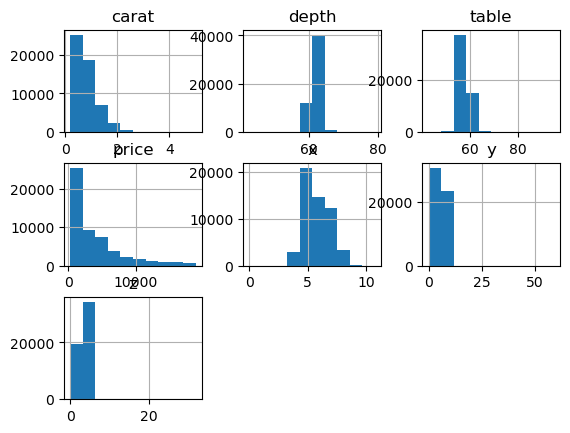

In [119]:
diamonds_df.hist()

#### 9.17 Working with the Iris.csv Dataset in Pandas
The Iris dataset is popular dataset for machine-learning that contains 150 records of information about three Iris plant species. Perform the following taskst to study and analyze the dataset:

    a) Download Iris.csv from one of the dataset repositories.
    b) Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record as the row index: df = pd.read_csv('Iris.csv', index_col=0)
    c) Display the DataFrame’s head.
    d) Display the DataFrame’s tail.
    e) Use the DataFrame method describe to calculate the descriptive statistics for the numerical data columns—SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm.
    f) Pandas has many built-in graphing capabilities. Execute the %matplotlib magic to enable Matplotlib support in IPython. Then, to view histograms of each numerical data column, call your DataFrame’s hist method.

In [129]:
# load the dataset
try:
    iris_df = pd.read_csv('Iris.csv',index_col=0)
except (FileNotFoundError):
    print("Error: file not found. Please check the file name and try again.")

# head of the Iris data
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
# tail of the Iris data
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [124]:
# Numeric Descriptive Statistics
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

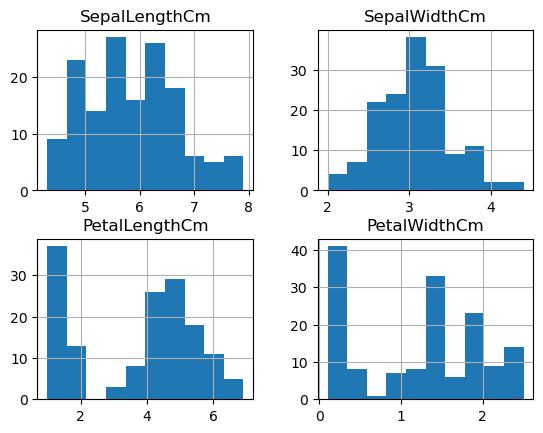

In [126]:
# histogram
iris_df.hist()